# Analysis notebook for the study of temporal reproduction

## Brief summary of the results

Behavior results showed that interval sequences with the same mean and standard deviation yielded different reproduction errors due to different temporal patterns. In the study, three types of temporal sequences were compared: the decelerating sequence (DS), accelerating sequence (AS), and random sequence (RS). The perceived mean was influenced by the first interval. The perceived volatility is influenced by the sequential structure. 

## Basic statistical analysis and visualization

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.precision", 3)
from sklearn.linear_model import LinearRegression

import pymc3 as pm
import arviz as az
import pingouin as pg

import warnings
warnings.filterwarnings('ignore')

import os
path = os.getcwd(); print(path)

/Users/strongway/LRZ Sync+Share/_git/temporal_patterns


/Users/strongway/LRZ Sync+Share/_git/temporal_patterns


In [15]:
raw = pd.read_csv(path+ '/data.csv')
raw.head()

,Unnamed: 0,X.1,X,cond,Set,intervalID,NSub,NT,valid,subj_mean,m_subj_mean,sd_subj_mean,SerialN,Dur,RP,Dur0,err,rerr
0,1,45,45,RS,17,1,1,45,1,735.738,0.759,0.137,1,1000,1036.833,1000,36.833,36.833
1,2,46,46,RS,2,1,1,46,1,791.234,0.759,0.137,1,400,456.068,400,56.068,140.171
2,3,47,47,AS,19,2,1,47,1,733.990,0.759,0.137,1,1100,892.031,1100,-207.969,-189.062
3,4,48,48,DS,4,1,1,48,1,723.716,0.759,0.137,1,400,562.917,400,162.917,407.292
4,5,49,49,AS,14,1,1,49,1,775.484,0.759,0.137,1,1000,1042.056,1000,42.056,42.056


### Central Tendency

Let's check the central tendency effect by plotting the reproduction as a function of given intervals, separated for three different sequentrial structures and two interval sets. 

In [16]:
# average reproduced interval for each participant, condition, interval sets, and individual interval
rp_mean2 = raw.groupby(['NSub','cond','intervalID','Dur']).agg({'RP':['mean','std']}).reset_index()
rp_mean2['cond'] =pd.Categorical(rp_mean2['cond'], categories=['AS','RS','DS'])
rp_mean2.columns = ['NSub','cond','intervalID','Dur','Rep','sd']

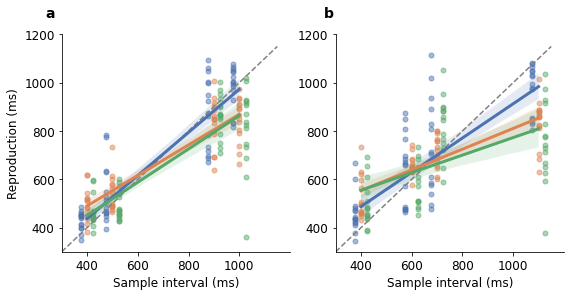

In [17]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# separated data for plotting
# interval sequence type 1
int1_as = rp_mean2.query("intervalID == 1 & cond=='AS'")
int1_rs= rp_mean2.query("intervalID == 1 & cond=='RS'")
int1_ds= rp_mean2.query("intervalID == 1 & cond=='DS'")

#interval sequence type 2
int2_as= rp_mean2.query("intervalID == 2 & cond=='AS'")
int2_rs= rp_mean2.query("intervalID == 2 & cond=='RS'")
int2_ds= rp_mean2.query("intervalID == 2 & cond=='DS'")

palette_tab3 = sns.color_palette("deep")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))

import matplotlib.transforms as transforms
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

ax1.plot([300,1150],[300,1150], c='grey', ls='--')

dx= 25
ax1.scatter(int1_as['Dur'] - dx, int1_as['Rep'], c = palette_tab3[0], s = 25, alpha=0.5)
sns.regplot(int1_as['Dur'], int1_as['Rep'], color = palette_tab3[0],scatter=False, ax=ax1,line_kws={'linewidth':3})

ax1.scatter(int1_rs['Dur'], int1_rs['Rep'], c = palette_tab3[1], s = 25, alpha=0.5)
sns.regplot(int1_rs['Dur'], int1_rs['Rep'], color = palette_tab3[1],scatter=False, ax=ax1,line_kws={'linewidth':3})

ax1.scatter(int1_ds['Dur'] + dx, int1_ds['Rep'], c = palette_tab3[2], s = 25, alpha=0.5)
sns.regplot(int1_ds['Dur'], int1_ds['Rep'], color = palette_tab3[2],scatter=False, ax=ax1,line_kws={'linewidth':3})
ax1.set_xlabel('Sample interval (ms)', fontsize= 12)
ax1.set_ylabel('Reproduction (ms)', fontsize= 12)
ax1.tick_params(bottom=True, left= True, labelsize =12)
ax1.set_xlim(300,1200)
ax1.set_ylim(300,1200)
ax1.set_xticks([400,600,800,1000])
ax1.set_yticks([400,600,800,1000,1200])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title('a', loc='left',fontdict= {'fontsize':14,'fontweight':'bold'}, y= 1.05, x= -0.07)

ax2.plot([300,1150],[300,1150], c='grey', ls='--')
ax2.scatter(int2_as['Dur'] - dx, int2_as['Rep'], c = palette_tab3[0], s = 25, alpha=0.5)
sns.regplot(int2_as['Dur'], int2_as['Rep'], color = palette_tab3[0],scatter=False,ax=ax2,line_kws={'linewidth':3})
ax2.scatter(int2_rs['Dur'], int2_rs['Rep'], c = palette_tab3[1], s = 25, alpha=0.5)
sns.regplot(int2_rs['Dur'], int2_rs['Rep'], color = palette_tab3[1],scatter=False,ax=ax2,line_kws={'linewidth':3})

ax2.scatter(int2_ds['Dur'] + dx, int2_ds['Rep'], c = palette_tab3[2], s = 25, alpha=0.5)
sns.regplot(int2_ds['Dur'], int2_ds['Rep'], color = palette_tab3[2],scatter=False,ax=ax2,line_kws={'linewidth':3})
ax2.set_xlabel('Sample interval (ms)', fontsize= 12)
ax2.set_ylabel('', fontsize= 12)
ax2.tick_params(bottom=True, left=True, labelsize =12)
ax2.set_xlim(300,1200)
ax2.set_ylim(300,1200)
ax2.set_xticks([400,600,800,1000])
ax2.set_yticks([400,600,800,1000,1200])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_title('b', loc='left',fontdict= {'fontsize':14,'fontweight':'bold'}, y= 1.05, x= -0.05)


plt.savefig(path + "/figures/figure2.png",dpi=300) 

In [20]:
# linear regression
def LinearReg(df):
    x = df['Dur']
    y = df['Rep']
    results = LinearRegression().fit(np.array(x).reshape(-1, 1), np.array(y))
    return results.coef_

reg = rp_mean2.groupby(['cond', 'NSub','intervalID']).apply(LinearReg)
reg_data = pd.DataFrame(reg).reset_index()
reg_data.columns = ['cond', 'NSub', 'intervalID', 'slope']
reg_data['slope'] = reg_data['slope'].astype(float)
reg_data.head()

,cond,NSub,intervalID,slope
0,AS,1,1,1.044
1,AS,1,2,0.435
2,AS,2,1,1.050
3,AS,2,2,0.923
4,AS,3,1,0.585


In [19]:
# Anova test on the slopes
pg.rm_anova(dv='slope', within=['cond', 'intervalID'], subject='NSub', data=reg_data, detailed=True)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,cond,1.484,2,28,0.742,16.919,1.523e-05,2.941e-04,0.240,0.649
1,intervalID,1.264,1,14,1.264,57.929,2.434e-06,2.434e-06,0.212,1.000
2,cond * intervalID,0.090,2,28,0.045,4.002,2.960e-02,3.791e-02,0.019,0.843


In [21]:
reg_data.groupby(['cond']).agg({'slope':['mean', 'std']}).reset_index()

cond  slope       
         mean    std
0   AS  0.801  0.210
1   RS  0.530  0.211
2   DS  0.526  0.347

In [11]:
pg.pairwise_ttests(data = reg_data, dv = 'slope', within= 'cond', subject = 'NSub', 
        parametric = True, padjust = 'bonferroni')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,cond,AS,DS,True,True,3.854,14.0,two-sided,1.753e-03,5.260e-03,bonferroni,23.952,1.122
1,cond,AS,RS,True,True,6.504,14.0,two-sided,1.393e-05,4.180e-05,bonferroni,1642.049,1.538
2,cond,DS,RS,True,True,-0.089,14.0,two-sided,9.306e-01,1.000e+00,bonferroni,0.263,-0.016


### Ensemble mean

The ensemble mean can be roughly estimated from the mean reproduction durations of four intervals. As we can see from the below boxplot, the mean was lower for DS as compared the AS sequence, suggesting the first interval (shorter in DS than in AS) may assimilated the ensemble mean. Or in another perspective, the ensemble mean was updated from the sequential intervals, with weight higher for the first one. 

In [24]:
# mean reproductions
rp_means = raw.groupby(['NSub','cond']).agg({'subj_mean':'mean'}).reset_index()
rp_means.head()

,cond,subj_mean
0,AS,702.538
1,DS,659.838
2,RS,680.071


/Users/cemrebaykan/miniconda3/envs/temporal_patterns/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NSub,f_int,subj_mean
0,1,Long,754.354
1,1,Middle,778.384
2,1,Short,772.487
3,2,Long,650.985
4,2,Middle,655.032


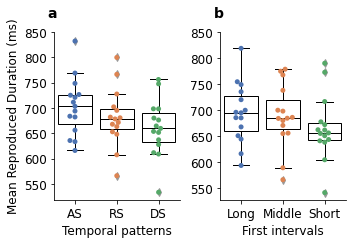

In [26]:
# average reproduced mean
rp_means = raw.groupby(['NSub','cond']).agg({'subj_mean':'mean'}).reset_index()

#let's divide RS data as first interval short-middle-long
raw_rs = raw.query('cond =="RS" & SerialN ==1')
conds= [(raw_rs['Dur'] < 700), (raw_rs['Dur'] == 700), 
        (raw_rs['Dur'] > 700)]
values = ['Short', 'Middle', 'Long']
raw_rs['f_int'] = np.select(conds, values)

# mean reproduced interval according to the first interval in the random sequence
rp_means_rs = raw_rs.groupby(['NSub','f_int']).agg({'subj_mean':'mean'}).reset_index()
#rp_means_rs.head()

# visualize the differences
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,3.5),tight_layout=True)

# plot of mean reproductions (all sequences)
sns.boxplot(x = 'cond', y = 'subj_mean', data = rp_means, color='white',order=['AS','RS','DS'], ax=ax1)
for line in ax1.get_lines():
    line.set_color('black')
    line.set_linewidth(1)
for box in ax1.patches:
    box.set_edgecolor('black')
    box.set_linewidth(1)

palette_new = {'AS': palette_tab3[0], 'RS': palette_tab3[1],'DS': palette_tab3[2]}

sns.swarmplot(ax = ax1, data = rp_means,order=['AS','RS','DS'], x = 'cond', y = 'subj_mean', palette=palette_new,hue='cond')
ax1.get_legend().remove()
ax1.set_xlabel('Temporal patterns', fontsize= 12)
ax1.set_ylabel('Mean Reproduced Duration (ms)', fontsize= 12)
ax1.set_title('a', loc='left',fontdict= {'fontsize':14,'fontweight':'bold'}, y= 1.05, x= -0.05)
ax1.tick_params(bottom=True, left= True, labelsize =12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_yticks([550,600,650,700,750,800,850])

# plot of mean reproductions (only RS)
sns.boxplot(x = 'f_int', y = 'subj_mean', data = rp_means_rs, ax=ax2, color='white')
for line in ax2.get_lines():
    line.set_color('black')
    line.set_linewidth(1)
for box in ax2.patches:
    box.set_edgecolor('black')
    box.set_linewidth(1)

sns.swarmplot(ax = ax2, data = rp_means_rs, x = 'f_int', y = 'subj_mean', hue = 'f_int',order=['Long','Middle','Short'], palette=palette_tab3)
ax2.get_legend().remove()
ax2.set_xlabel('First intervals', fontsize= 12)
ax2.set_ylabel('')
ax2.set_title('b', loc='left',fontdict= {'fontsize':14,'fontweight':'bold'}, y= 1.05, x= -0.05)
ax2.tick_params(bottom=True, left= True, labelsize =12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_yticks([550,600,650,700,750,800,850])

#plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig(path + "/figures/figure3_1.png",dpi=300) 

In [15]:
# all mean reproductions
aov = pg.rm_anova(data = rp_means, dv = 'subj_mean', within = 'cond', subject = 'NSub', detailed = True)
aov

,Source,SS,DF,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,cond,13290.886,2,6645.443,18.079,9.093e-06,2.121e-04,0.564,0.648,False,0.456,0.006
1,Error,10292.216,28,367.579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
posthoc = pg.pairwise_ttests(data = rp_means, dv = 'subj_mean', within= 'cond', subject = 'NSub', 
        parametric = True, padjust = 'bonferroni')
posthoc

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,cond,AS,DS,True,True,4.665,14.0,two-sided,3.644e-04,0.001,bonferroni,92.547,0.733
1,cond,AS,RS,True,True,3.198,14.0,two-sided,6.452e-03,0.019,bonferroni,8.001,0.377
2,cond,DS,RS,True,True,-4.653,14.0,two-sided,3.727e-04,0.001,bonferroni,90.757,-0.351


In [17]:
# RS mean reproductions 
aov = pg.rm_anova(data = rp_means_rs, dv = 'subj_mean', within = 'f_int', subject = 'NSub', detailed = True)
aov

,Source,SS,DF,MS,F,p-unc,np2,eps
0,f_int,6809.86,2,3404.93,7.78,0.002,0.357,0.841
1,Error,12255.03,28,437.68,NaN,NaN,NaN,NaN


In [18]:
posthoc = pg.pairwise_ttests(data = rp_means_rs, dv = 'subj_mean', within= 'f_int', subject = 'NSub', 
        parametric = True, padjust = 'bonferroni')
posthoc

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,f_int,Long,Middle,True,True,0.938,14.0,two-sided,0.364,1.000,bonferroni,0.383,0.091
1,f_int,Long,Short,True,True,3.602,14.0,two-sided,0.003,0.009,bonferroni,15.69,0.471
2,f_int,Middle,Short,True,True,2.590,14.0,two-sided,0.021,0.064,bonferroni,3.001,0.368


### Variance of reproduction

Let's check the reproduction variability, separated for three different sequentrial structures and two interval sets. 

In [28]:
rp_mean2 = raw.groupby(['NSub','cond','intervalID','Dur']).agg({'RP':['mean','std']}).reset_index()
rp_mean2['cond'] =pd.Categorical(rp_mean2['cond'], categories=['AS','RS','DS'])
rp_mean2.columns = ['NSub','cond','intervalID','Dur','Rep','sd'] 
pg.rm_anova(data = rp_mean2, dv = 'sd', within = ['cond','Dur'], subject = 'NSub', detailed = True)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,cond,289062.130,2,28,144531.065,48.308,8.360e-10,2.677e-08,0.208,0.807
1,Dur,166788.763,6,84,27798.127,16.288,2.391e-12,1.027e-07,0.132,0.552
2,cond * Dur,59184.694,12,168,4932.058,3.455,1.461e-04,1.134e-02,0.051,0.359


/Users/cemrebaykan/miniconda3/envs/temporal_patterns/lib/python3.7/site-packages/pingouin/distribution.py:485: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn("Epsilon values might be innaccurate in "


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,cond,289062.130,2,28,144531.065,48.308,8.360e-10,2.677e-08,0.775,0.807
1,Dur,166788.763,6,84,27798.127,16.288,2.391e-12,1.027e-07,0.538,0.552
2,cond * Dur,59184.694,12,168,4932.058,3.455,1.461e-04,1.134e-02,0.198,0.359


In [29]:
pg.pairwise_ttests(data = rp_mean2, dv = 'sd', within= 'cond', subject = 'NSub', 
        parametric = True, padjust = 'bonferroni')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,cond,AS,DS,True,True,0.812,14.0,two-sided,4.306e-01,1.000e+00,bonferroni,0.349,0.090
1,cond,AS,RS,True,True,-7.430,14.0,two-sided,3.200e-06,9.600e-06,bonferroni,6128.665,-1.177
2,cond,DS,RS,True,True,-8.203,14.0,two-sided,1.022e-06,3.067e-06,bonferroni,1.714e+04,-1.189


In [31]:
# for figure
rp_mean2_sub = rp_mean2.groupby(['cond','intervalID','Dur']).agg({'sd':['mean','std','count','sem']}).reset_index()
rp_mean2_sub.columns = ['cond','intervalID','Dur','sd_m','sd','n','se']
rp_mean2_sub= rp_mean2_sub.dropna()
rp_mean2_sub.head()

,cond,intervalID,Dur,sd_m,sd,n,se
0,AS,1,400,103.202,64.154,15,16.565
1,AS,1,500,125.366,64.608,15,16.682
4,AS,1,900,161.487,57.403,15,14.821
5,AS,1,1000,117.613,48.128,15,12.427
7,AS,2,400,138.231,70.156,15,18.114


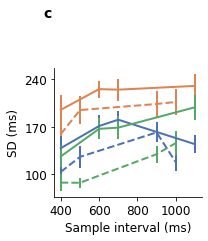

In [32]:
f, (ax1) = plt.subplots(1, figsize=(3,3.5),tight_layout=True)
rp_mean2_sub_1 = rp_mean2_sub.query("intervalID ==1")

# plot for interval sequence type 1
i=0
for key, group in rp_mean2_sub_1.groupby('cond'):
    group.plot('Dur', 'sd_m', yerr='se',
               label=key, ax=ax1, color=palette_tab3[i], linewidth=2, linestyle='--')
    i=i+1

ax1.set_title('c', loc='left',fontdict= {'fontsize':14,'fontweight':'bold'}, y= 1.35, x= -0.07)
ax1.tick_params(bottom=True, left= True, labelsize =12)
ax1.set_yticks([100, 170,240])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('SD (ms)', fontsize= 12)


# plot for interval sequence type 2
rp_mean2_sub_2 = rp_mean2_sub.query("intervalID ==2")
i=0
for key, group in rp_mean2_sub_2.groupby('cond'):
    group.plot('Dur', 'sd_m', yerr='se',
               label=key, ax=ax1, color=palette_tab3[i],linewidth=2)
    i=i+1
ax1.tick_params(bottom=True, left= True, labelsize =12)
ax1.set_xticks([400,600,800,1000])
ax1.set_yticks([100, 170,240])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('SD (ms)', fontsize= 12)
ax1.set_xlabel('Sample interval (ms)', fontsize= 12)
ax1.get_legend().set_visible(False)


plt.savefig(path + "/figures/figure3_2.png",dpi=300, bbox_inches='tight')

## Modeling

In [36]:
# sort raw data based on the subject, trial No. (X), and sequence (SerialN)
raw = raw.sort_values(by=['NSub','X','SerialN'])
# get the first duration 
isFirst = raw.SerialN == 1
Dur1 = np.repeat(np.array(raw.Dur[isFirst]),4)
# add the first duration to the table
raw['Dur1'] = Dur1
# model on average data
rp_mean = raw.groupby(['NSub','cond','Dur','Dur1']).agg({'RP':['mean','std']}).reset_index()
rp_mean.columns = ['NSub','cond','Dur','Dur1','Rep','sd'] # reset column names
rp_mean2 = rp_mean.query('cond != "RS"')
Cond = rp_mean2.cond.replace(['AS','DS','RS'],[0,1,2]).astype(int)
Dur1 = rp_mean2.Dur1
Durs = rp_mean2.Dur
rp_mean.head()

,NSub,cond,Dur,Dur1,Rep,sd
0,1,AS,400,1000,449.215,74.899
1,1,AS,400,1100,599.699,274.767
2,1,AS,500,1000,479.349,99.163
3,1,AS,600,1100,476.819,141.944
4,1,AS,700,1100,935.082,172.316


,NSub,cond,Dur,Dur1,Rep,sd
0,1,AS,400,1000,449.215,74.899
1,1,AS,400,1100,599.699,274.767
2,1,AS,500,1000,479.349,99.163
3,1,AS,600,1100,476.819,141.944
4,1,AS,700,1100,935.082,172.316


In [37]:
with pm.Model() as wModel:

    # Weber fraction of the sensory input
    wf = pm.Uniform('wf',lower=0,upper =1, shape = 1)
    # the weight of the first interval
    w = pm.Uniform('w',lower = 0, upper = 1, shape = 1)
    mPrior =  (1-w)*700 + w*Dur1  # weighted average
    #prior uncertainty by Weber fraction of the prior
    wf_p = pm.Uniform('wf_p',lower = 0, upper = 1, shape = 1)
    # volatility scaling
    vol_s = pm.HalfNormal('vol_s',sigma=3, shape = 2)
    # integration
    # sensory reliability
    sig_s_2 = (wf*Durs)**2 * vol_s[Cond]
    sig_p = mPrior*wf_p
    w_p = sig_s_2 / (sig_s_2 + sig_p**2)
    
    Rep = w_p*mPrior + (1-w_p)*Durs

    # reproduction variance influence by volatility
    #sig_m = pm.HalfCauchy('sig_m', 1)

    sig_rep = np.sqrt(sig_s_2*sig_p**2 / (sig_s_2 + sig_p**2) )

    # observed data
    predRep = pm.Normal('predRep', mu = Rep, sigma = sig_rep, observed = rp_mean2.Rep)
mtrace = pm.sample(model = wModel,  target_accept = 0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vol_s, wf_p, w, wf]


/Users/strongway/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/strongway/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/strongway/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/strongway/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.
The number of effective samples is smaller than 25% for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'wf'}>,
        <AxesSubplot:title={'center':'wf'}>],
       [<AxesSubplot:title={'center':'wf_p'}>,
        <AxesSubplot:title={'center':'wf_p'}>],
       [<AxesSubplot:title={'center':'vol_s'}>,
        <AxesSubplot:title={'center':'vol_s'}>]], dtype=object)

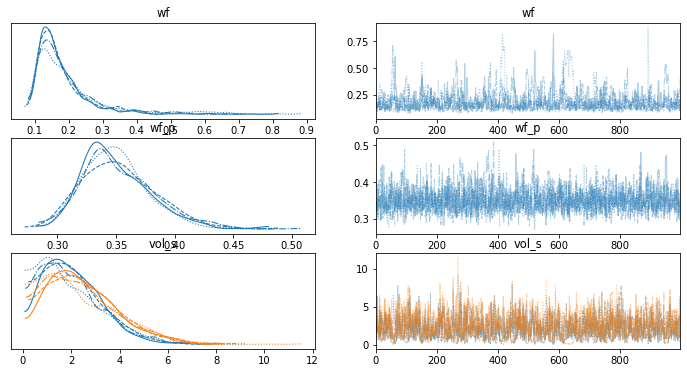

In [38]:
az.plot_trace(mtrace, var_names = ['wf', 'wf_p','vol_s'])

In [39]:
results = az.from_pymc3(mtrace)
res_tab = az.summary(results)
res_tab

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
wf[0],0.184,0.090,0.087,0.348,0.005,0.004,652.0,401.0,1.01
w[0],0.197,0.073,0.063,0.335,0.002,0.001,1570.0,871.0,1.00
wf_p[0],0.351,0.031,0.298,0.409,0.001,0.001,1831.0,1361.0,1.00
vol_s[0],2.020,1.284,0.095,4.276,0.043,0.031,663.0,411.0,1.00
vol_s[1],2.414,1.499,0.108,5.071,0.051,0.036,647.0,429.0,1.00


In [40]:
ppc = pm.sample_posterior_predictive(mtrace, var_names = ['wf','wf_p','vol_s','predRep'], model = wModel) 

<AxesSubplot:xlabel='Dur', ylabel='predicted'>

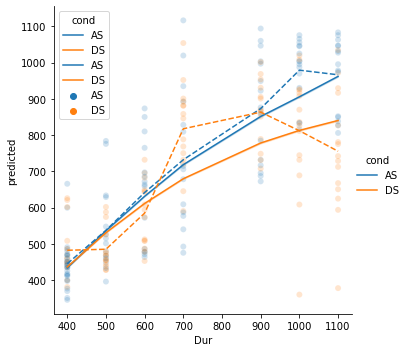

In [41]:
predResp = ppc['predRep'].mean(axis=0)
predSig = ppc['predRep'].std(axis = 0)
rp_mean2['predicted'] = predResp
rp_mean2['sdPred'] = predSig
rp_mean2.head()
sns.relplot(data = rp_mean2, x = "Dur", y = 'predicted', hue = 'cond', kind = 'line')
sns.lineplot(data = rp_mean2, x = 'Dur',y = 'Rep', hue = 'cond', linestyle = '--', ci = None)
sns.scatterplot(data = rp_mean2, x = "Dur", y = 'Rep', hue = 'cond', alpha = 0.2)

### model for the random condition

In [44]:
rp_mean_r = rp_mean.query('cond == "RS"')
Dur1 = rp_mean_r.Dur1
Durs = rp_mean_r.Dur
#rp_mean_r.head()
# parameters from AS/DS
print(res_tab['mean'])
[wf, w, wf_p, vol1, vol2] = res_tab['mean']
print([wf, w, wf_p, vol1, vol2])

wf[0]       0.184
w[0]        0.197
wf_p[0]     0.351
vol_s[0]    2.020
vol_s[1]    2.414
Name: mean, dtype: float64
[0.184, 0.197, 0.351, 2.02, 2.414]


wf[0]       0.185
w[0]        0.197
wf_p[0]     0.351
vol_s[0]    1.983
vol_s[1]    2.354
Name: mean, dtype: float64
[0.185, 0.197, 0.351, 1.983, 2.354]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [vol_s]


/Users/strongway/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/strongway/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/strongway/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/strongway/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in transla

array([[<AxesSubplot:title={'center':'vol_s'}>,
        <AxesSubplot:title={'center':'vol_s'}>]], dtype=object)

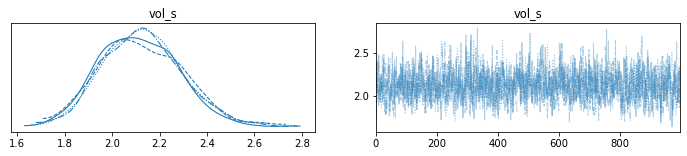

In [45]:
with pm.Model() as wModel_r:
    # same model, but with fixed parameters obtained from wModel
    # volatility scaling
    vol_s = pm.HalfNormal('vol_s',sigma=3, shape = 1)

    mPrior =  (1-w)*700 + w*Dur1  # weighted average
    # integration
    # sensory reliability
    sig_s_2 = vol_s * (wf*Durs)**2 
    sig_p = mPrior*wf_p
    w_p = sig_s_2 / (sig_s_2 + sig_p**2)
    
    Rep = w_p*mPrior + (1-w_p)*Durs

    sig_rep = np.sqrt(sig_s_2*sig_p**2 / (sig_s_2 + sig_p**2) )

    # observed data
    predRep = pm.Normal('predRep', mu = Rep, sigma = sig_rep, observed = rp_mean_r.Rep)

mtrace_r = pm.sample(model = wModel_r,  target_accept = 0.9)
az.plot_trace(mtrace_r, var_names = ['vol_s'])

Got error No model on context stack. trying to find log_likelihood in translation.


           mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
vol_s[0]  2.123  0.17   1.823    2.452      0.005    0.003    1362.0   

          ess_tail  r_hat  
vol_s[0]    2073.0    1.0  


<AxesSubplot:xlabel='Dur', ylabel='predicted'>

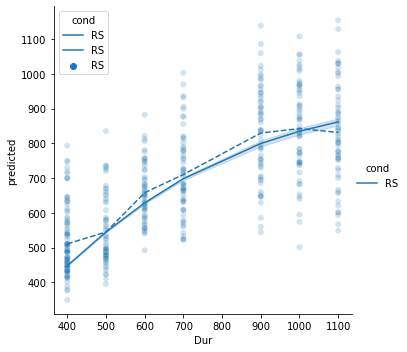

In [46]:
results_r = az.from_pymc3(mtrace_r)
res_r = az.summary(results_r)
print(res_r)
ppc = pm.sample_posterior_predictive(mtrace_r, var_names = ['vol_s','predRep'], model = wModel_r) 
predResp = ppc['predRep'].mean(axis=0)
predSig = ppc['predRep'].std(axis = 0)
rp_mean_r['predicted'] = predResp
rp_mean_r['sdPred'] = predSig
sns.relplot(data = rp_mean_r, x = "Dur", y = 'predicted', hue = 'cond', kind = 'line')
sns.lineplot(data = rp_mean_r, x = 'Dur',y = 'Rep', hue = 'cond', linestyle = '--', ci = None)
sns.scatterplot(data = rp_mean_r, x = "Dur", y = 'Rep', hue = 'cond', alpha = 0.2)

In [47]:
rp_mean_all = pd.concat([rp_mean2, rp_mean_r])
#output predicted means
rp_mean_all.groupby(['cond']).agg({'Rep':['mean','std'],'predicted':['mean','std']}).reset_index()

cond      Rep          predicted         
           mean      std      mean      std
0   AS  702.476  239.105   684.070  196.233
1   DS  685.781  190.421   669.950  141.516
2   RS  685.333  177.109   664.852  156.674

In [48]:
rp_mean_all2 = rp_mean_all.groupby(['cond','NSub','Dur']).agg({'Rep':['mean'],'predicted':['mean']}).reset_index()
rp_mean_all2.columns = ['cond','NSub','Dur','mRep','mPred']
rp_mean_all2.head()

,cond,NSub,Dur,mRep,mPred
0,AS,1,400,524.457,433.967
1,AS,1,500,479.349,535.311
2,AS,1,600,476.819,629.668
3,AS,1,700,935.082,718.621
4,AS,1,900,1003.510,856.254


In [49]:
def LinearReg_all1(df): #we get coefficient of determination (𝑅²) 
    x = df['mRep']
    y = df['mPred']
    results = LinearRegression().fit(np.array(x).reshape(-1, 1), np.array(y))
    return results.score(np.array(x).reshape(-1, 1), np.array(y))

reg1 = rp_mean_all2.groupby(['cond','NSub']).apply(LinearReg_all1)
reg_data1 = pd.DataFrame(reg1).reset_index()
reg_data1.columns = ['cond', 'NSub', 'R_sq']
reg_data1['R_sq'] = reg_data1['R_sq'].astype(float)
reg_data1.tail()

,cond,NSub,R_sq
40,RS,11,0.962
41,RS,12,0.923
42,RS,13,0.962
43,RS,14,0.957
44,RS,15,0.937


In [50]:
reg_data1.groupby(['cond']).agg({'R_sq':['mean', 'std']}).reset_index()

cond   R_sq       
         mean    std
0   AS  0.799  0.108
1   DS  0.623  0.325
2   RS  0.906  0.095

In [51]:
pg.rm_anova(dv='R_sq', within=['cond'], subject='NSub', data=reg_data1, detailed=True)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,cond,0.612,2,0.306,8.515,0.001,0.005,0.257,0.687,False,0.543,0.019
1,Error,1.006,28,0.036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


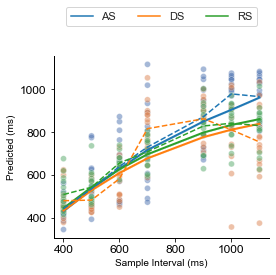

In [52]:
g = plt.figure(figsize=(4, 4),tight_layout=True)

g= sns.lineplot(data = rp_mean_all2, x = "Dur", y = 'mPred', hue = 'cond',linewidth=2)
g= sns.lineplot(data = rp_mean_all2, x = 'Dur',y = 'mRep', hue = 'cond', linestyle = '--', ci = None, legend="",linewidth=1.5)
g= sns.scatterplot(data = rp_mean_all2, x = "Dur", y = 'mRep',  alpha = 0.5, hue='cond',legend="",palette=palette_tab3[0:3])
g.set_yticks([400,600,800,1000])
g.set_xticks([400,600,800,1000])
#g.set_xticks([400,500,600,700,800,900,1000,1100])

g.tick_params(bottom=True, left= True, labelsize =12)

g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)

g.set(xlabel = 'Sample Interval (ms)', ylabel = 'Predicted (ms)')

sns.set(rc={'figure.figsize':(3,3)})
g.tick_params(axis='x', colors='black')
g.tick_params(axis='y', colors='black')
g.spines['bottom'].set_color('black')
g.spines['bottom'].set_linewidth(1)
g.spines['left'].set_color('black')
g.spines['left'].set_linewidth(1)
sns.set_style("whitegrid", {'axes.grid' : False})

g.legend(title="",loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.3))

plt.savefig(path + '/figures/figure4_1.png',dpi=300,bbox_inches='tight')

In [97]:
mrp = rp_mean_all.groupby(['cond']).agg({'Rep':['mean','std'],'predicted':['mean','std']}).reset_index()
mrp.columns =  ['cond','mRep','sdRep','mPred','sdPred']
mrp.head()
nsub = np.size(rp_mean_all.NSub.unique())

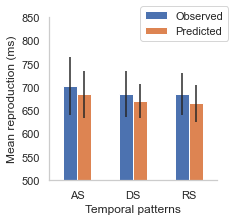

In [100]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()
mrp[['mRep','mPred']].plot.bar(ax = ax, yerr = [mrp.sdRep/np.sqrt(nsub), mrp.sdPred/np.sqrt(nsub)], rot = 0)
ax.set_xlabel("Temporal patterns")
ax.set_xticklabels(['AS','DS','RS'])
ax.set_ylabel("Mean reproduction (ms)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(500,850)

ax.legend(title="",loc="upper right", labels = ['Observed','Predicted'],
    ncol=1,bbox_to_anchor=(1.1, 1.1))
plt.savefig(path + '/figures/figure4_2.png',dpi=300,bbox_inches='tight')
plt.show()
